In [40]:
from google.colab import files
uploaded = files.upload()


Saving song_list_capstone_EN.xlsx to song_list_capstone_EN (3).xlsx


In [41]:
import pandas as pd

# Read your uploaded Excel file
df = pd.read_excel('song_list_capstone_EN.xlsx', engine='openpyxl')

# Preview the first few rows
df.head()


,Date,Title Song,Singer,Sad song(Yes/No)
0,2022-01-01,How Does It Feel To Be Forgotten,"Selena Gomez, benny blanco",Yes
1,2022-01-02,Backburner,NIKI,Yes
2,2022-01-03,Cola,Lana Del Rey,Yes
3,2022-01-04,No One Noticed,The Marias,Yes
4,2022-01-05,Ojos Tristes,"Selena Gomez, benny blanco, The Marias",Yes


In [42]:
# Clean spacing and capitalization to avoid errors
df['Sad song(Yes/No)'] = df['Sad song(Yes/No)'].astype(str).str.strip().str.title()


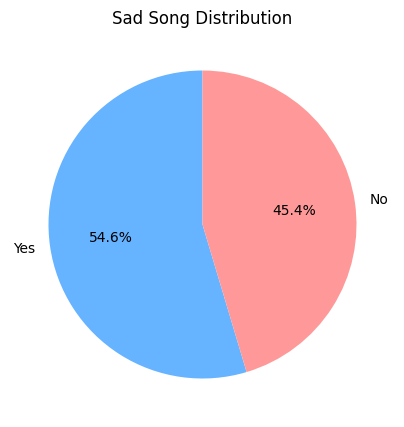

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
df['Sad song(Yes/No)'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
plt.title('Sad Song Distribution')
plt.ylabel('')
plt.show()


In [44]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [45]:
df['Month'] = df['Date'].dt.to_period('M')


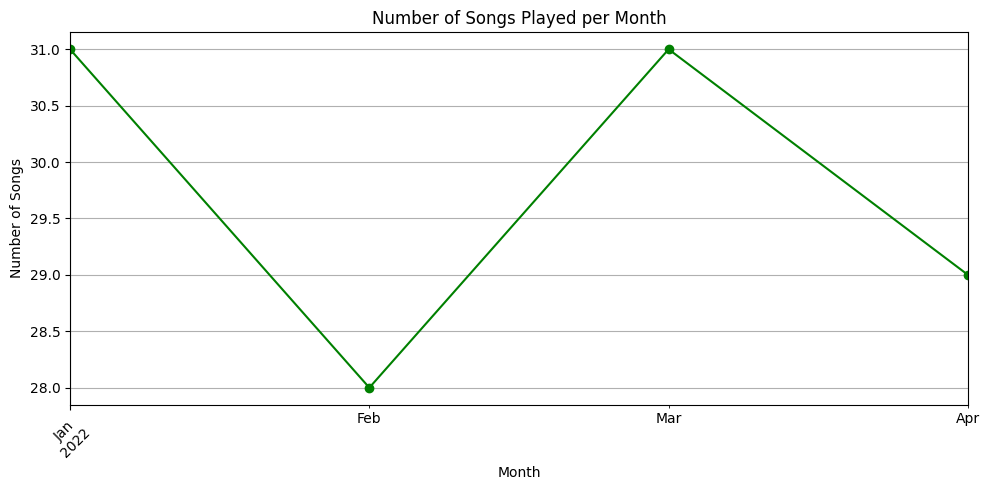

In [46]:
songs_per_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
songs_per_month.plot(kind='line', marker='o', color='green')
plt.title('Number of Songs Played per Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
# Split multiple artists in one cell
all_artists = df['Singer'].dropna().str.split(', ')
all_artists = all_artists.explode()


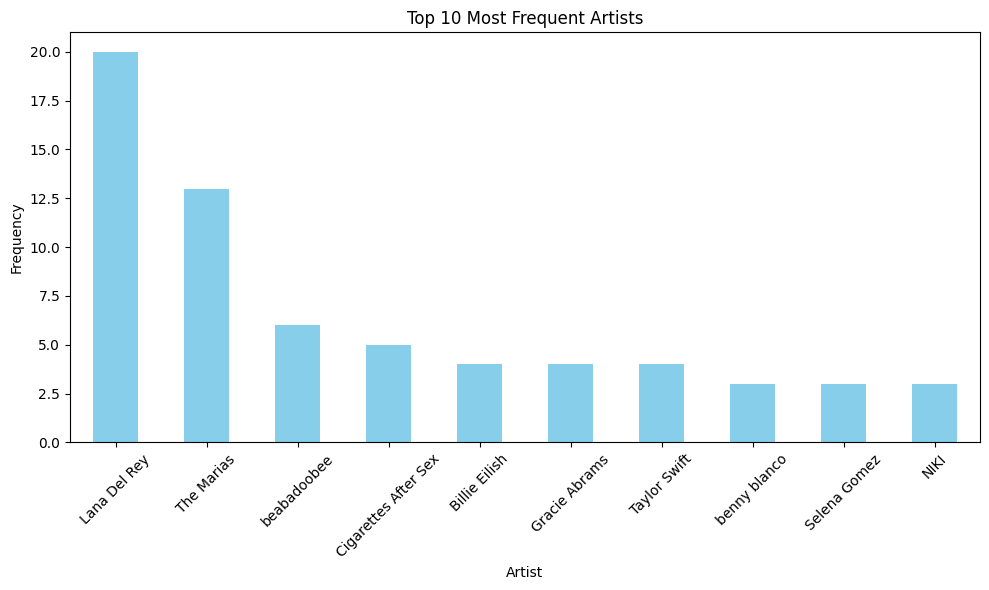

In [48]:
top_artists = all_artists.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
print("Total number of songs:", len(df))
print("Number of unique artists:", df['Singer'].nunique())


Total number of songs: 119
Number of unique artists: 64
